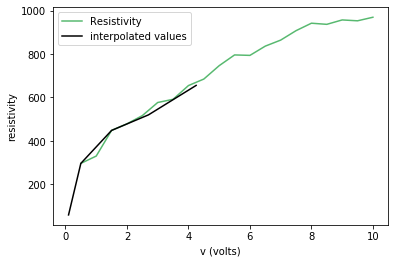

These are the interpolated values
 [59.29462365591399, 296.4731182795699, 448.35483870967744, 519.9684407176065, 655.5290165001309]


In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


####### Calibration Data Tasks ##############
 
path = "/Users/Alexander/Documents/MSP/PRA1500 Tools for Practical Physics/Session 3 - Calibration Curves and Transformation of Variables/voltage current and r hold data.csv"

### Array that will be used to create the lookup table
new_V = [0.1,0.5,1.5,2.7,4.25]

### Function that calculates resistivity for the whole table or specific index
def Resistivity(path,index=None):
    
    ### Read the csv
    light_bulb_data = pd.read_csv(path)
    
    ### Runs the code below for a specific user defined variable, 'index'
    if (index!=None):
        
        ### Getting the data
        V = light_bulb_data['v (volts)'].values[index] #Voltage
        
        A = light_bulb_data['a (amps)'].values[index] #Amps
        
        R = light_bulb_data['r_hold (ohms)'].values[index] #Resistance of light bulb

        ### Calculate the resistivity using the equation below     
        resistivity = (5.65*((V/A)-R))/0.93
        
        string = "For "+str(V)+" volts, the resistivity is: " + str(resistivity)
        
        print(string)
    
    ### Runs the code below for a list of voltages
    else:
        
        V = light_bulb_data['v (volts)'].values
        
        A = light_bulb_data['a (amps)'].values #Amps
    
        R = light_bulb_data['r_hold (ohms)'].values #Resistance of light bulb
        
        resistivity = []
        
        for i in range(len(V)):
                              
            resistivity.append(5.65*((V[i]/A[i])-R[i])/0.93)
        
        return V,resistivity
function = Resistivity(path)


def Interpolate(x,y,new_V):

    new_ro = []
    
    ### Checking for every index if it is below the first data point
    for i in range(len(new_V)):
        if new_V[i] < x[0]:
            new_ro.append(0 + (new_V[0] - 0) * ((y[0]-0)/(x[0])-0))
    
    ### Calculates the interpolated values for voltages specified in the array.
    ### Uses a nested for loop to find the upper and lower bound and checks if the
    ### is in the table
    for i in range(len(function[0])):
        for j in range(len(new_V)):
            if (new_V[j] < x[i]) and (new_V[j] > x[i-1]):
                
                new_ro.append(y[i-1] + (new_V[j] - x[i-1]) * ((y[i]-y[i-1])/(x[i])-x[i-1]))
                
            elif (new_V[j] == x[i]):
                
                new_ro.append(y[i])
    
    return new_ro, new_V




### Checking if index was given
try: 
    
    x = function[0]
    y = function[1]
    
    new_x = Interpolate(x,y,new_V)[1]
    new_y = Interpolate(x,y,new_V)[0]
    
    ### Plotting the graph
    plt.plot(x, y, color='#58b970', label='Resistivity')
    plt.plot(new_x, new_y,color = '#000000', label='interpolated values')

    plt.xlabel("v (volts)")
    plt.ylabel("resistivity")
    plt.legend()
    plt.show()
    
    print("These are the interpolated values\n",Interpolate(x,y,new_V)[0])
    
except:
    
    function
    
# table = {'v (volts)':}

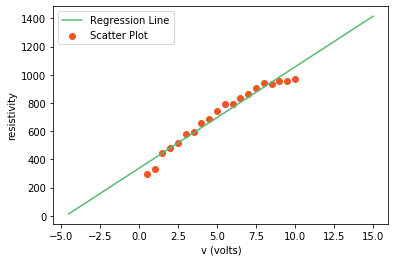

Root Mean Square Error:  43.385755930191635
R squared:  0.9580270122504676
Gradient:  71.89277951069619
y-intercept:  336.6261874585364
The error in the gradient is  3.5468684978791454
The error in the y-intercept is  21.244232312965625
The percentage error in the gradient is  4.933553163501549
The percentage error in the y-intercept is  6.310926809751652


In [4]:
####### Curve Fitting to Calibration Curves Tasks ##############
### We reused the code from week 1 task 2

def Least_Squares_Analysis(function):

    # Setting the x and y arrays
    x = function[0]
    y = function[1]
    
    # Calculating their mean
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    n = len(x)
    
    numerator = 0
    denomenator = 0
    #Calculating the gradient and the y-interept
    for i in range(n):
        numerator += (x[i] - x_mean) * (y[i] - y_mean)
        denomenator += (x[i] - x_mean)**2
        m = numerator / denomenator
        c = y_mean - (m * x_mean)
    
    max_x = np.max(x) + 5
    min_x = np.min(x) - 5
    
    lin = np.linspace(min_x,max_x,1000)
    curve = m * lin + c
    
    # Calculating Root Mean Squares Error
    rmse = 0
    for i in range(n):
        y_pred = c + m * x[i]
        rmse += (y[i] - y_pred) ** 2
    rmse = np.sqrt(rmse/n)
    
    # Calculating R^2 Score
    ss_tot = 0
    ss_res = 0
    for i in range(n):
        y_pred = c + m * x[i]
        ss_tot += (y[i] - y_mean) ** 2
        ss_res += (y[i] - y_pred) ** 2
    r2 = 1 - (ss_res/ss_tot)
    
    # Calculating the error for the gradient and y-intercept
    s = np.sqrt((ss_tot-m*numerator)/(n-2))
    error_gradient = s/np.sqrt(denomenator)
    error_intercept = s*np.sqrt((1/n) + (x_mean**2)/denomenator)

    
    return lin,curve,x,y,rmse,r2,m,c,error_gradient,error_intercept
    

# independant = input("What's the column name for the independant variable? ")
# dependant = input("What's the column name for the dependant variable? ")
# lower_limit = int(input("From which index do you want to start the regression? "))
# upper_limit = int(input("Which index do you want the regression to finish on? "))
independant = "v (volts)"
dependant = "resistivity"
lower_limit = 0
upper_limit = 20

# Ploting Line
x_1,y_1,X,Y,rmse,r2,m,c,error_m,error_c = Least_Squares_Analysis(function)


plt.plot(x_1, y_1, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel(independant)
plt.ylabel(dependant)
plt.legend()
plt.show()
print("Root Mean Square Error: ",rmse)
print("R squared: ",r2)
print("Gradient: ",m)
print("y-intercept: ",c)
print("The error in the gradient is ",error_m)
print("The error in the y-intercept is ",error_c)
print("The percentage error in the gradient is ",(error_m/m)*100)
if (c < 0):
    print("The percentage error in the y-intercept is ",(error_c/c)*-100)
else:
    print("The percentage error in the y-intercept is ",(error_c/c)*100)

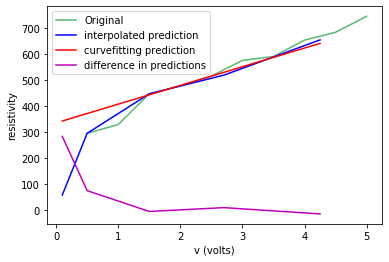

In [5]:
u = np.empty(len(new_V))
b = Interpolate(x,y,new_V)[0] ### values of resistivity using the lookup table
diff = np.empty(len(new_V))

### Calculating the resistivity using the linear regression model
for i in range(len(new_V)):
    u[i] = m*new_V[i] + c
    
### Calculating the differene betweent the lookup table and curve fit
for i in range(len(u)):
    diff[i] = u[i] - b[i]

### Plotting the origional data
plt.plot(x[0:10], y[0:10], color='#58b970', label='Original')

### Plotting the lookup table data
plt.plot(new_x, new_y,color = 'b', label='interpolated prediction')

### Plotting the prediction from the curvefitting
plt.plot(new_x,u,color="r",label='curvefitting prediction')

### Plotting the absolute error between the interpolated and curvefitting
plt.plot(new_x,diff,color="m",label='difference in predictions')

plt.xlabel("v (volts)")
plt.ylabel("resistivity")
plt.legend()
plt.show()

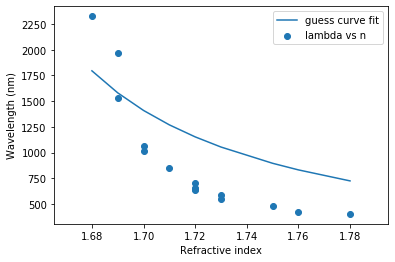

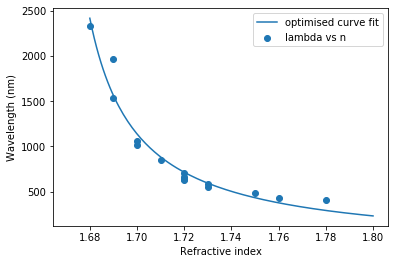

wavelength = A + B*(n - E)^(-1) + C*(n - E)^(-1) + D*(n - E)^(-1)
A = -129.3340152424134
B = 293.09261763750504
C = 116.06831565583423
D = -358.7110610698025
E = 1.660178858410268
[2.02506818e+02 6.26530497e+07 1.37990746e+07 1.54897426e+08
 6.28212416e-03]


In [20]:
####### Two-step Calibration Curve Tasks ##############

path = '/Users/Alexander/Documents/MSP/PRA1500 Tools for Practical Physics/Session 3 - Calibration Curves and Transformation of Variables/n vs lambda.csv'

refraction_data = pd.read_csv(path)

x = refraction_data['n']
y = refraction_data['Lambda (nm)']

### A function that computes this equation
### wavelength = A + B*(n - E)^(-1) + C*(n - E)^(-1) + D*(n - E)^(-1)
### where c1 = A, c2 = B, c3 = C, c4 = D, c5 = E

### A function that computes this equation
### wavelength = A + B*(n - E)^(-1) + C*(n - E)^(-1) + D*(n - E)^(-1)
### where c1 = A, c2 = B, c3 = C, c4 = D, c5 = E
def lamda(n,c1,c2,c3,c4,c5):
    return c1 + c2*(n - c5)**(-1)+ c3*(n - c5)**(-1)+ c4*(n - c5)**(-1) 

### Function that calculates the refractive index
def R_I(theta):
    return np.sqrt(((2/np.sqrt(3))*np.sin(theta) + 0.5)**2 + 0.75)

### A good guess must be made in order to find the free variables
### guess = [c1,c2,c3,c4,c5]
g = [-130,200,271,-317,1.6]

w = np.empty(len(x))
for i in range(len(x)):
    w[i] = lamda(x[i],g[0],g[1],g[2],g[3],g[4])

### Plotting the curve fit for the guessed numbers
plt.scatter(x,y,label='lambda vs n')
plt.plot(x,w,label='guess curve fit')
plt.xlabel("Refractive index")
plt.ylabel("Wavelength (nm)")
plt.legend()
plt.show()

### Optimising the guess values to get a improved curve fit
from scipy.optimize import curve_fit
### c are the free varaibles and cov is the covariance 
c,cov = curve_fit(lamda,x,y,g) 

### The function we used before to calculate the parameters A, B, C, D, E
### also outputs the covariance. The diagonals of this array give the 
### variance of the parameter. 
perr = np.sqrt(np.abs(np.diag(cov)))

fit_x = np.linspace(1.68,1.8,128)
fit_y = lamda(fit_x,c[0],c[1],c[2],c[3],c[4])

### Plotting the curve fit with the optimised free variables
plt.scatter(x,y,label='lambda vs n')
plt.plot(fit_x,fit_y,label='optimised curve fit')
plt.xlabel("Refractive index")
plt.ylabel("Wavelength (nm)")
plt.legend()
plt.show()

print("wavelength = A + B*(n - E)^(-1) + C*(n - E)^(-1) + D*(n - E)^(-1)")
print("A = " + str(c[0]) + "\nB = " + str(c[1]) + "\nC = " + str(c[2]) + 
      "\nD = " + str(c[3]) + "\nE = " + str(c[4]))
print(perr)


    theta (degrees)  theta (rad)         n       lambda
0                 0     0.000000  1.000000   205.752506
1                 2     0.034907  1.020746   208.231859
2                 4     0.069813  1.042610   211.025115
3                 6     0.104720  1.065489   214.167971
4                 8     0.139626  1.089279   217.703059
5                10     0.174533  1.113875   221.681583
6                12     0.209440  1.139172   226.165448
7                14     0.244346  1.165068   231.230026
8                16     0.279253  1.191461   236.967843
9                18     0.314159  1.218255   243.493541
10               20     0.349066  1.245352   250.950666
11               22     0.383972  1.272661   259.521130
12               24     0.418879  1.300092   269.438657
13               26     0.453786  1.327559   281.008311
14               28     0.488692  1.354980   294.635589
15               30     0.523599  1.382275   310.871022
16               32     0.558505  1.409368   33

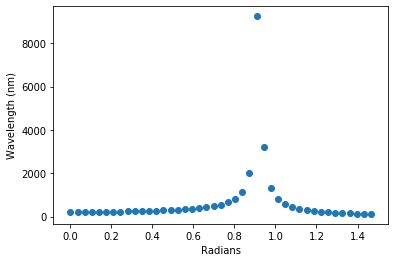

In [292]:
### Create an array of angles in steps of two from 0 to 85 degrees
pi = np.pi
theta = np.arange(0,85,2)
### Converting the degrees to radians
rad = np.arange(0,(85*pi)/180,(2*pi)/180)
n = np.empty(len(rad))
for i in range(len(rad)):
    ### Calculate refractive index
    n[i] = (R_I(rad[i]))

### Calculate the wavelength for the given values of theta
w = np.empty(len(n))
for i in range(len(n)):
    ### Taking the absolute of the wavelength as it only has magnitude.  
    w[i] = abs(lamda(n[i],c[0],c[1],c[2],c[3],c[4]))

d = {'theta (degrees)': theta,'theta (rad)': rad,'n': n,'lambda': w}
df = pd.DataFrame(data=d)

print()
print(df)

plt.scatter(rad,w)
plt.xlabel("Radians")
plt.ylabel("Wavelength (nm)")
plt.show()

In [294]:
####### Errors in the Transformation of Variables Tasks ##############

from scipy.special import stdtr

a = rad
b = w
print(len(w))

# Compute the descriptive statistics of a and b.
abar = a.mean()
avar = a.var(ddof=1)
na = a.size
adof = na - 1

bbar = b.mean()
bvar = b.var(ddof=1)
nb = b.size
bdof = nb - 1

# Use the formulas directly.
tv = (abs(abar - bbar)) / np.sqrt(avar/na + bvar/nb)
dof = (avar/na + bvar/nb)**2 / (avar**2/(na**2*adof) + bvar**2/(nb**2*bdof))
pv = 2*stdtr(dof, -np.abs(tf))

# Student t-distribution Percent Point Function
from scipy.stats import t
# define probability
p = 0.95
# retrieve value <= probability
c_value = t.ppf(p, dof)


print("critical-value is ",c_value)
print(f"standard-deviation for radians is {np.sqrt(avar)}")
print(f"standard-deviation for wavelength is {np.sqrt(bvar)}")
print("t-value = %g  p-value = %g" % (tv, pv))

43
critical-value is  1.6819523490188473
standard-deviation for radians is 0.4383058894715929
standard-deviation for wavelength is 1450.8329963236333
t-value = 3.01783  p-value = 0.00431357


In [295]:
### Now we can find the error in our parameters for the curve fit
err_w = f"error in the wavelrngth is {np.sqrt(bvar) * c_value}"
err_r = f"error in the radians is {np.sqrt(avar) * c_value}"
print(err_w)
print(err_r)

error in the wavelrngth is 2440.2319662005875
error in the radians is 0.7372096203855408


In [285]:
### We have the x (refractive index) and y (wavelength)
### We have to get the wavelength of the fitted curve at point x and
### get the difference in length between the origional point ot the curve

x = np.array(x)
y = np.array(y)

### Array to hold the wavelength at the values of x
q = np.empty(len(y))
for i in range(len(y)):
    q[i] = lamda(x[i],c[0],c[1],c[2],c[3],c[4])

### Array to hold the difference in y from points to curve fit
diff_y_rel = np.empty(len(y))
diff_y_abs = np.empty(len(y))
for i in range(len(y)):
    diff_y_rel[i] = abs(y[i] - q[i])/ y[i]
    diff_y_abs[i] = abs(y[i] - q[i])

### The relative error is the absolute error divided by actual value

# from sympy import var,Eq,solve
# o = var('o')
# diff_x = np.empty(len(x))
# for i in range(len(y)):
#     sol = solve(Eq((c1-y[i])*(o-c5)**3 + c2*(o-c5)**2 + c3*(o-c5) + c4))
#     diff_x[i] = abs(sol[0]-x[i])/x[i]
# print(diff_x)

print("relative errors in the wavelength for the data-points")
print(diff_y_rel)

relative errors in the wavelength for the data-points
[0.03892733 0.20693645 0.021453   0.07318654 0.12187153 0.03659869
 0.01063153 0.08793414 0.11043729 0.12833625 0.00665988 0.08629311
 0.11060206 0.11679506 0.27919658]


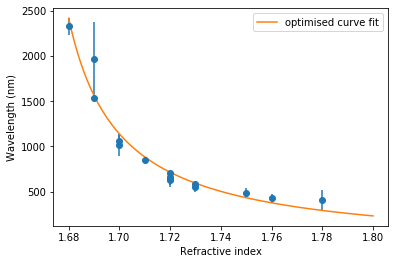

In [296]:
### Plotting the curve fit with the optimised free variables
# plt.scatter(x,y,label='lambda vs n')
plt.errorbar(x,y,yerr=diff_y_abs,fmt='o')
plt.plot(fit_x,fit_y,label='optimised curve fit')
plt.xlabel("Refractive index")
plt.ylabel("Wavelength (nm)")
plt.legend()
plt.show()